In [1]:
import pandas as pd

# Reading the data
train_data = pd.read_csv('C:/Users/payel/Desktop/Data Analysis/train.csv')

In [2]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#dropping off columns - Cabin and Ticket
train_data = train_data.drop('Name', axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#since many "Age" column have missing values, we need to fill them 
train_data.Age = train_data.Age.fillna(train_data.Age.mean())
train_data.describe()

#you can see the count of Age has increased to 819 from 714

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
#predicting passenger survival using Random Forest Classifier
# we won't be able to do it. Error:- it needs some iterable character to join (even if we do it by "survived")

In [ ]:
#some analysis - Age , Passenger, Gender, Family , Fare, Embarkment 

In [7]:
#Fare Analysis 
fare_df = train_data[['Survived', 'Pclass','Fare']]
fare_df.head()

,Survived,Pclass,Fare
0,0,3,7.2500
1,1,1,71.2833
2,1,3,7.9250
3,1,1,53.1000
4,0,3,8.0500


In [26]:
#in the above output , we can see that Passenger class 3 has the least fare than 1 or 2 import 

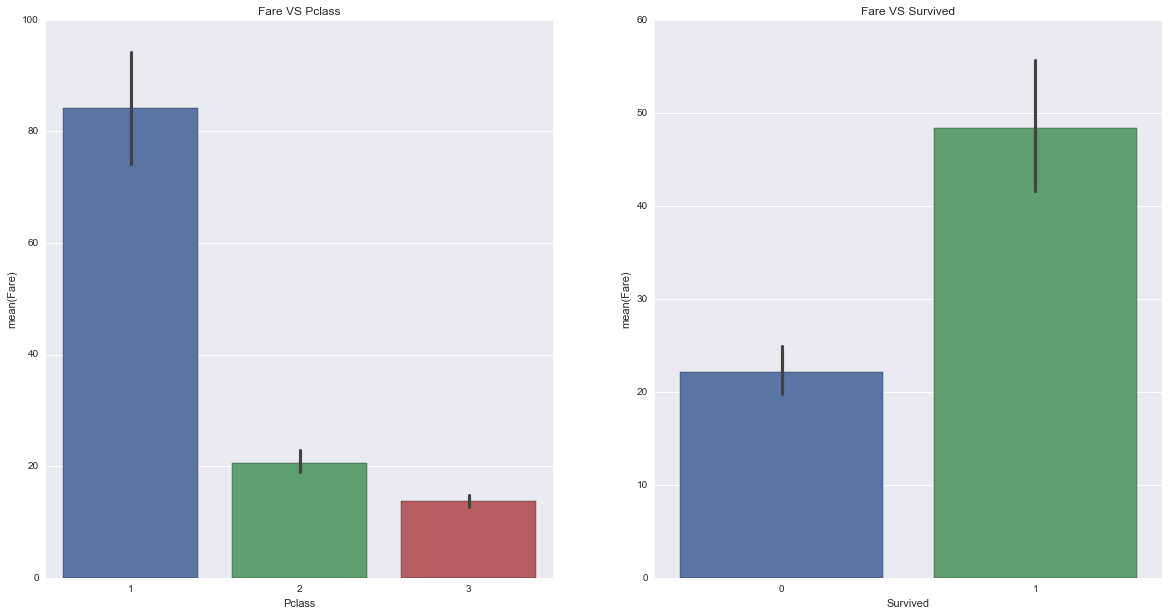

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

fig,(axis1,axis2) = plt.subplots(1,2,figsize=(20,10))
axis1.set_title('Fare VS Pclass')   #Pclass is of 3 types - 1, 2 ,3
axis2.set_title('Fare VS Survived') #survived is of 2 types - 0 , 1

sns.barplot(x='Pclass', y='Fare', data = fare_df, ax=axis1)
sns.barplot(x='Survived', y='Fare', data = fare_df, ax=axis2)

In [9]:
#Gender Analysis 
gender_df = train_data[['Survived', 'Pclass','Fare', 'Sex']]
gender_df.head()

,Survived,Pclass,Fare,Sex
0,0,3,7.2500,male
1,1,1,71.2833,female
2,1,3,7.9250,female
3,1,1,53.1000,female
4,0,3,8.0500,male


In [21]:
#let's first convert the gender into binary values :- Male for 0 and female for 1

df = train_data.replace(to_replace='male',value=0 ).replace(to_replace='female',value=1)
#df = train_data.replace(to_replace='female',value=1)


#df= train_data['Sex'].aggfunc=lambda x: x.map({'Female':1,'Male':0}).mean()
df

#pt = train_data.pivot_table(values='Sex',index=['Survived'],aggfunc=lambda x: x.map({'Female':1,'Male':0}).mean())
#pt.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,0,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,0,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,0,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,0,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,1,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,1,14.000000,1,0,237736,30.0708,NaN,C


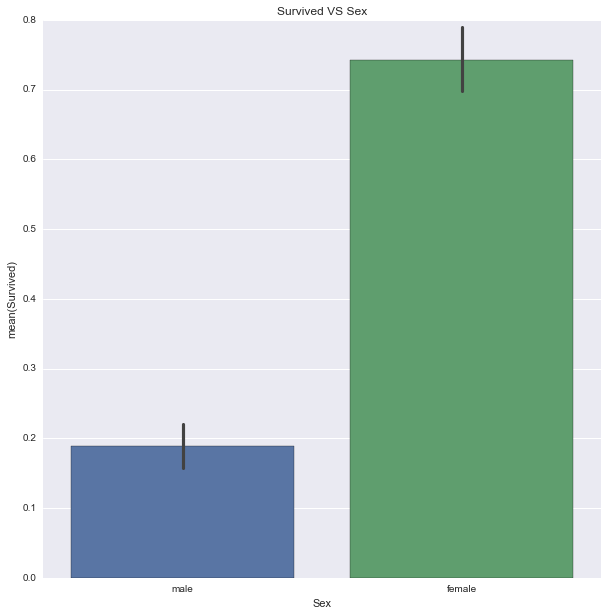

In [22]:
fig,axis1 = plt.subplots(1,figsize=(10,10))
axis1.set_title('Survived VS Sex')   


sns.barplot(x='Sex', y='Survived', data = gender_df, ax=axis1)


In [23]:
#Pclass Analysis
pclass_df = train_data[['Survived', 'Pclass','Fare', 'Sex']]
pclass_df.head()

,Survived,Pclass,Fare,Sex
0,0,3,7.2500,male
1,1,1,71.2833,female
2,1,3,7.9250,female
3,1,1,53.1000,female
4,0,3,8.0500,male


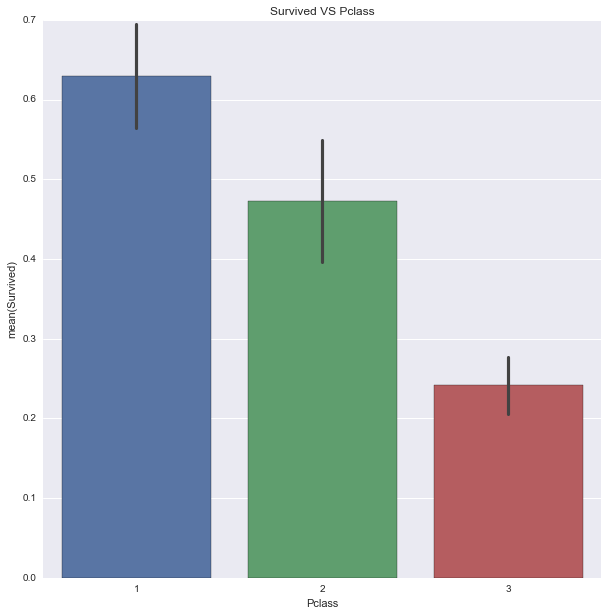

In [42]:
fig,axis1 = plt.subplots(1,figsize=(10,10))
axis1.set_title('Survived VS Pclass')   


sns.barplot(x='Pclass', y='Survived', data = pclass_df, ax=axis1)


In [24]:
#Family status 
#parch : no. of parents / children aboard the Titanic
parch_df = train_data[['Survived', 'Pclass','Fare', 'Sex', 'Parch']]
parch_df.head()


,Survived,Pclass,Fare,Sex,Parch
0,0,3,7.2500,male,0
1,1,1,71.2833,female,0
2,1,3,7.9250,female,0
3,1,1,53.1000,female,0
4,0,3,8.0500,male,0


In [25]:
parch_df.tail()

,Survived,Pclass,Fare,Sex,Parch
886,0,2,13.00,male,0
887,1,1,30.00,female,0
888,0,3,23.45,female,2
889,1,1,30.00,male,0
890,0,3,7.75,male,0


In [26]:
#since Parch and SibSp has many different values so, we can't plot them on the graph directly in X-axis 

#We need to do Feature Engineering here,to create a new feature called "With_Family" 
#which would contain information on both chilren and spouses.

df['With_Family'] = (df['Parch'].astype(bool) | df['SibSp'].astype(bool)).astype(int)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,With_Family
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


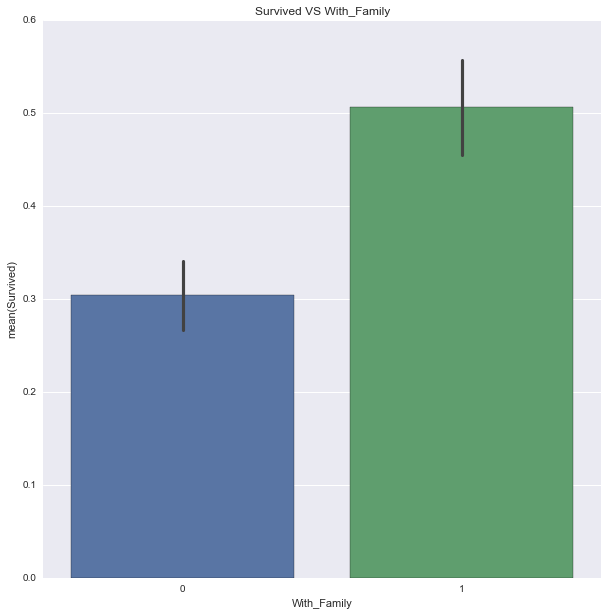

In [27]:
fig,axis1 = plt.subplots(1,figsize=(10,10))
axis1.set_title('Survived VS With_Family')   


sns.barplot(x='With_Family', y='Survived', data = df, ax=axis1)


In [28]:
#Age analysis 
age_df = train_data[['Survived', 'Pclass','Fare', 'Sex', 'Age']]
age_df.head()


,Survived,Pclass,Fare,Sex,Age
0,0,3,7.2500,male,22.0
1,1,1,71.2833,female,38.0
2,1,3,7.9250,female,26.0
3,1,1,53.1000,female,35.0
4,0,3,8.0500,male,35.0


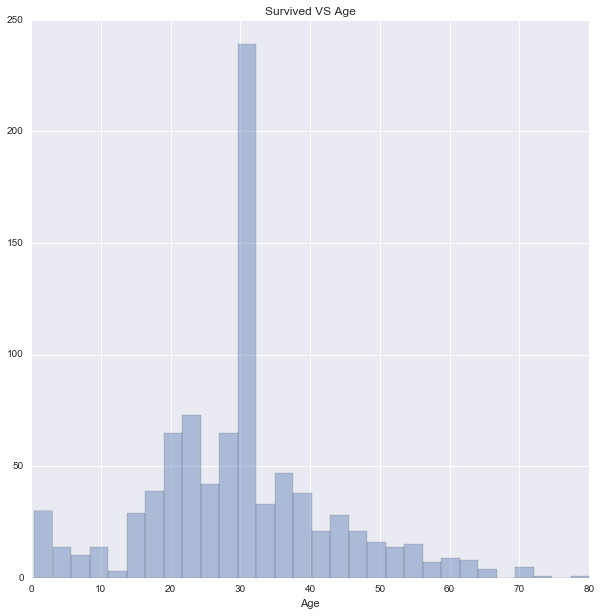

In [29]:
fig,axis1 = plt.subplots(1,figsize=(10,10))
axis1.set_title('Survived VS Age')   


sns.distplot(age_df.Age, label='Survived', hist=True, kde=False)


In [30]:
#Embarkment analysis 
embarked_df = train_data[['Survived', 'Pclass','Fare', 'Sex', 'Age', 'Embarked']]
embarked_df.head()  # Embarkement is of 3 types - C = Cherbourg, Q = Queenstown, S = Southampton


,Survived,Pclass,Fare,Sex,Age,Embarked
0,0,3,7.2500,male,22.0,S
1,1,1,71.2833,female,38.0,C
2,1,3,7.9250,female,26.0,S
3,1,1,53.1000,female,35.0,S
4,0,3,8.0500,male,35.0,S


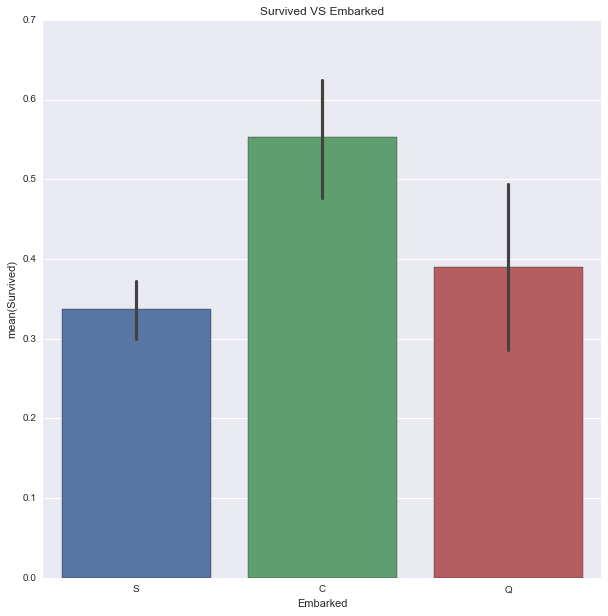

In [31]:
fig,axis1 = plt.subplots(1,figsize=(10,10))
axis1.set_title('Survived VS Embarked')   


sns.barplot(x='Embarked', y='Survived', data = embarked_df, ax=axis1)

In [32]:
train_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

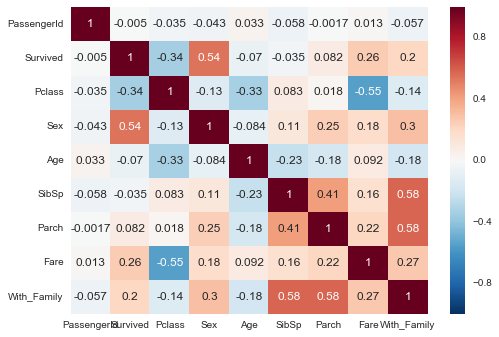

In [33]:
sns.heatmap(df.corr(), linecolor='white', annot=True) #problem of gender still occurs . since it can;t be converted to binary, it can't be there in correlation matrix 

In [70]:
#The negative correlation coefficient in the matrix implies that if one of the values increases the other decreases.